# 1. 빙 이미지 검색으로 곰 이미지 분류 문제에 필요한 데이터를 다운로드 함


In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


#hide
from fastbook import *
from fastai.vision.widgets import *

# 빙 이미지 검색 서비스 api key 활용
key = os.environ.get('AZURE_SEARCH_KEY', 'xxx(마이크로소프트의 빙 이미지 검색 서비스에서 발급한 API Key)')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
search_images_bing # 책 저장소의 utils라는 파일이 제공하는 편의 기능

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
# 간단하게 함수 사용해보기
# 회색곰 이미지 146장의 URL을 성공적으로 다운로드함
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl') # 책에서는 content_url로 되어 있는데, 'contentUrl'이렇게 써야함
len(ims)
print(ims)

['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg', 'https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg', 'https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg', 'https://www.animalfactsencyclopedia.com/images/grizzlybearstanding.jpg', 'https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg', 'https://animalcorner.org/wp-content/uploads/2015/02/grizzly-bear-1.jpg', 'http://animalfactguide.com/wp-content/uploads/2013/01/grizzlybear-2.jpg', 'https://www.wallpics.net/wp-content/uploads/2020/12/Grizzly-Bear-10.jpg', 'http://bearlegend.com/wp-content/uploads/2012/03/grizzlyBear_photofurl.jpeg', 'http://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizzly-Bear-7.jpg', 'https://www.expeditionsalaska.co

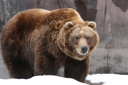

In [ ]:
# 다운로드한 이미지 하나 확인해보기
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128, 128)

In [ ]:
# 각 검색어에서 얻은 모든 URL의 이미지를 fastai가 제공하는 download_images 함수로 다운로드
# 검색어별 이미지는 검색어가 이름인 별도의 폴더에 저장하도록 만듦
bear_types = 'grizzly', 'black', 'teddy'
print(bear_types)

path = Path('bears')

if not path.exists():
  path.mkdir()

  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('contentUrl'))

('grizzly', 'black', 'teddy')


In [ ]:
# 생성된 폴더와 이미지 파일 확인
fns = get_image_files(path)
fns

(#411) [Path('bears/grizzly/706c3493-457d-4a61-93b3-90ef168090ca.jpg'),Path('bears/grizzly/f41fc783-ef50-45c3-a5f1-a12e0ffdbf0d.jpg'),Path('bears/grizzly/371d2a8f-c1f2-44cb-89da-7df46007871e.jpg'),Path('bears/grizzly/7eb9d911-6fea-429a-9428-23d1f211bc1a.jpg'),Path('bears/grizzly/6160563d-d94a-4727-80e3-9bf02bff7626.jpg'),Path('bears/grizzly/89df8eef-d222-46cb-ade3-4b4cd3faa415.jpg'),Path('bears/grizzly/eb01fcf8-6d49-4778-b9e0-06d908ccc033.jpg'),Path('bears/grizzly/ff80ff7b-682d-4c04-8e60-4519a4464737.jpg'),Path('bears/grizzly/e783e66e-fe9c-4526-a7a0-5e5f461f4912.jpg'),Path('bears/grizzly/e1830065-49e3-4548-8e13-96bab5eaacb8.jpg')...]

In [ ]:
# 파일의 오류 여부를 확인할 수 있는 vertify_images 함수
failed = verify_images(fns)
failed

(#23) [Path('bears/grizzly/89df8eef-d222-46cb-ade3-4b4cd3faa415.jpg'),Path('bears/grizzly/5e6f6608-cceb-48ca-b56b-fc0b3986effa.JPG'),Path('bears/grizzly/cf395479-0b94-4c3d-8142-0c1418ed20a4.jpg'),Path('bears/grizzly/2a1b7738-3f31-4b9c-96a8-9da2a8a1301b.jpg'),Path('bears/grizzly/db9db94f-3d66-42f1-b626-1913e497322e.JPG'),Path('bears/grizzly/796181d4-6884-4337-bf95-10b01834916c.jpg'),Path('bears/grizzly/70d9eb61-88df-4855-999d-9d71b4447f86.jpg'),Path('bears/grizzly/357f7fa1-9156-4c94-869f-6659157cc5a8.jpg'),Path('bears/black/ae2438f3-5f45-4ae8-814c-b5f9839b1127.JPG'),Path('bears/black/35d87899-ef0c-4d87-b0f4-97b8f1ac5a9a.jpg')...]

In [ ]:
# 밑에 코드는 unlink 함수를 통해 오류가 발생한 파일(요소)를 삭제함
failed.map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
# 주피터 노트북에서는 아래와 같은 유용한 점이 있음
# 1. 각 함수의 결과를 즉각적으로 파악할 수 있음
# 2. 코드 내부를 즉시 살펴보기 등 함수의 사용 방법을 알아보는데 유용한 여러 가지 기능을 제공함

# 2번째 부분 진행
??verify_images

"""
Signature: verify_images(fns)
Source:
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py
Type:      function
"""

'\nSignature: verify_images(fns)\nSource:   \ndef verify_images(fns):\n    "Find images in `fns` that can\'t be opened"\n    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)\nFile:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py\nType:      function\n\n'

## 📌 주피터 노트북에서 유용한 명령어

#### 1. 함수나 인자의 정확한 철자가 기억나지 않는경우, 'Tab 키'를 눌러서 제안된 자동 완성 목록을 확인할 수 있음

<br>

#### 2. 함수의 괄호 안에서 'Shift 키'와 'Tab 키'를 동시에 누르면, 함수의 원형과 짧은 설명을 담은 팝업 창이 나타남. 이 키 조합을 연속으로 두 번 누르면 설명 문서의 내용이 확장되고, 세 번 누르면 팝업창 대신 별도의 창이 화면 하단에 나타남

<br>

#### 3. 셀에서 '?함수 이름'을 입력해 실행하면 함수의 원형과 짧은 설명을 담은 창이 화면 하단에 나타남

<br>

#### 4. 셀에서 '??함수 이름'을 실행하면 함수의 원형, 짧은 설명, 구현 코드를 담은 창이 화면 하단에 나타남

<br>

#### 5. fastai 라이브러리는 doc이라는 함수를 제공함. 'doc(함수 이름)'처럼 함수를 호출하면, 함수의 원형, 짧은 설명, 깃허브 소스 코드 링크, 해당 라이브러리를 다루는 문서의 웹사이트 주소 링크를 담은 창이 화면 하단에 나타남

<br>

#### 6. 문서 외에도 매우 유용한 기능이 있음. 에러 발생 시 에러가 발생한 셀에 '%debug'를 입력해 실행하면 파이썬 디버거가 열리며, 여기서 모든 변수의 내용을 확인할 수 있음
